In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("European Restaurant Reviews.csv")
data.head(10)

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...
5,France,The Frog at Bercy Village,Negative,"Shocking management, TERRIBLE service by mum a...",Jul 2021 •,We visited this restaurant on Saturday night a...
6,France,The Frog at Bercy Village,Negative,We tired the tasting menu - avoid,Jan 2020 •,We tired the tasting menu with wine pairing. T...
7,France,The Frog at Bercy Village,Negative,Huge Disappointment,Oct 2019 •,This restaurant’s high rating is wholly unwarr...
8,France,The Frog at Bercy Village,Negative,Expensive mediocre food and service,Jun 2019 •,We got the Tasting Menu and wine pairing. Fran...
9,France,The Frog at Bercy Village,Negative,all around awful,May 2019 •,My wife and I booked well in advance based on ...


In [3]:
data.shape

(1502, 6)

In [4]:
data.columns

Index(['Country', 'Restaurant Name', 'Sentiment', 'Review Title',
       'Review Date', 'Review'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          1502 non-null   object
 1   Restaurant Name  1502 non-null   object
 2   Sentiment        1502 non-null   object
 3   Review Title     1502 non-null   object
 4   Review Date      1502 non-null   object
 5   Review           1502 non-null   object
dtypes: object(6)
memory usage: 70.5+ KB


In [6]:
data.describe()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
count,1502,1502,1502,1502,1502,1502
unique,7,7,2,1343,143,1426
top,France,The Frog at Bercy Village,Positive,Excellent,May 2014 •,I'm afraid we were very let down by this resta...
freq,512,512,1237,9,108,4


In [7]:
data.isnull().sum()

Country            0
Restaurant Name    0
Sentiment          0
Review Title       0
Review Date        0
Review             0
dtype: int64

In [8]:
# Sentiment distribution
sentiment_distribution = data['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    1237
Negative     265
Name: count, dtype: int64

In [9]:
# Country distribution
country_distribution = data['Country'].value_counts()
country_distribution

Country
France     512
Italy      318
Morroco    210
Cuba       146
Poland     135
Russia     100
India       81
Name: count, dtype: int64

In [10]:
# Most reviewed restaurants
most_reviewed_restaurants = data['Restaurant Name'].value_counts().head(10)
most_reviewed_restaurants

Restaurant Name
The Frog at Bercy Village                512
Ad Hoc Ristorante (Piazza del Popolo)    318
The LOFT                                 210
Old Square (Plaza Vieja)                 146
Stara Kamienica                          135
Pelmenya                                 100
Mosaic                                    81
Name: count, dtype: int64

In [11]:
# Specify the date format and re-parse the review dates
data['Review Date'] = pd.to_datetime(data['Review Date'], format='%b %Y •', errors='coerce')



In [12]:
# Re-calculate the distribution of reviews over time
review_date_distribution = data['Review Date'].dt.to_period('M').value_counts().sort_index()



C:\Users\USER\AppData\Local\Temp\ipykernel_8524\853217853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sentiment', palette='viridis')


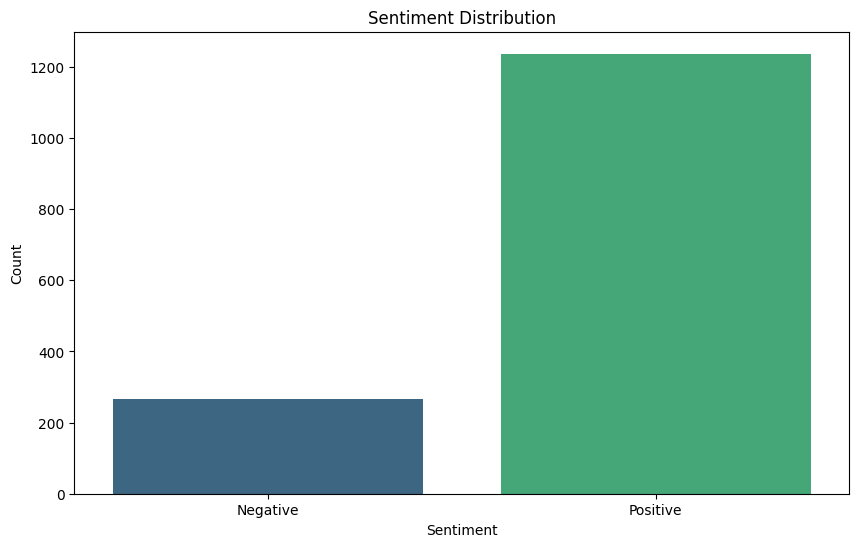

In [13]:


# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()





C:\Users\USER\AppData\Local\Temp\ipykernel_8524\996489768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Country', palette='viridis')


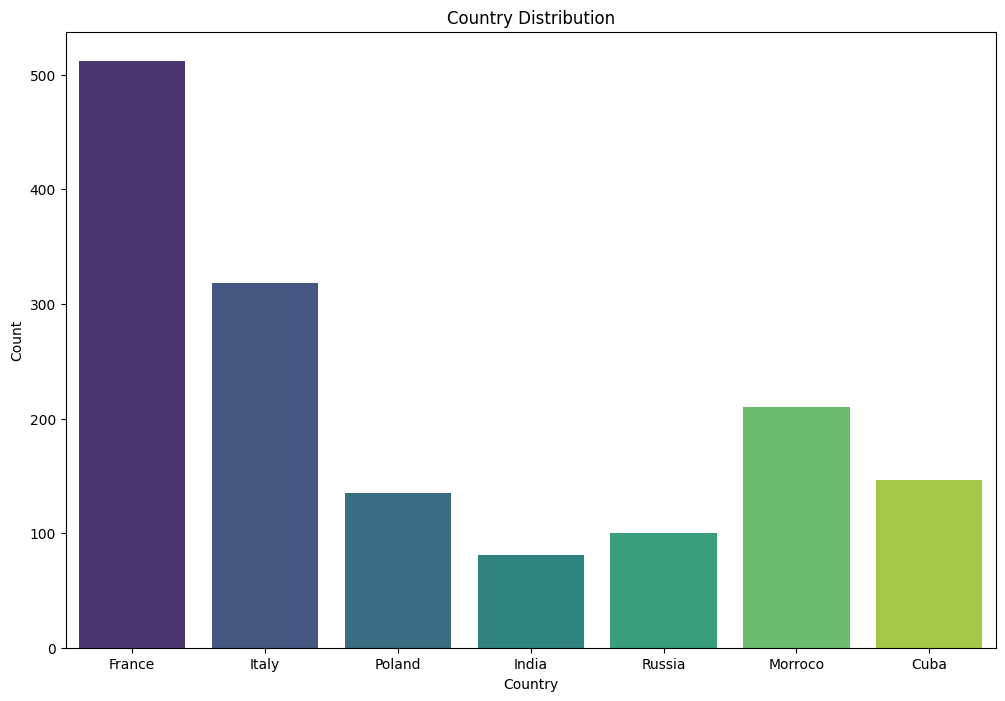

In [14]:
# Plot country distribution
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Country', palette='viridis')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8524\505382965.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_common_words_titles, x='Frequency', y='Word', palette='viridis')


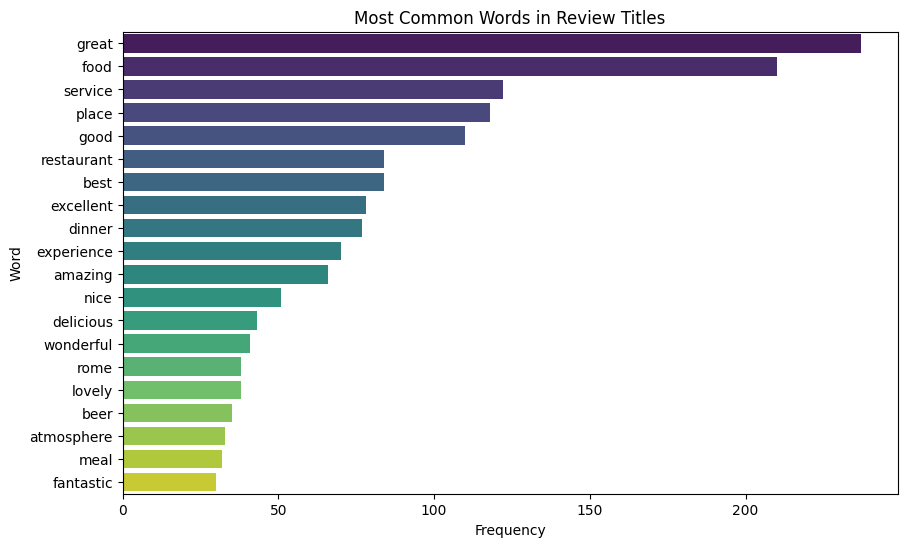

C:\Users\USER\AppData\Local\Temp\ipykernel_8524\505382965.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_common_words_reviews, x='Frequency', y='Word', palette='viridis')


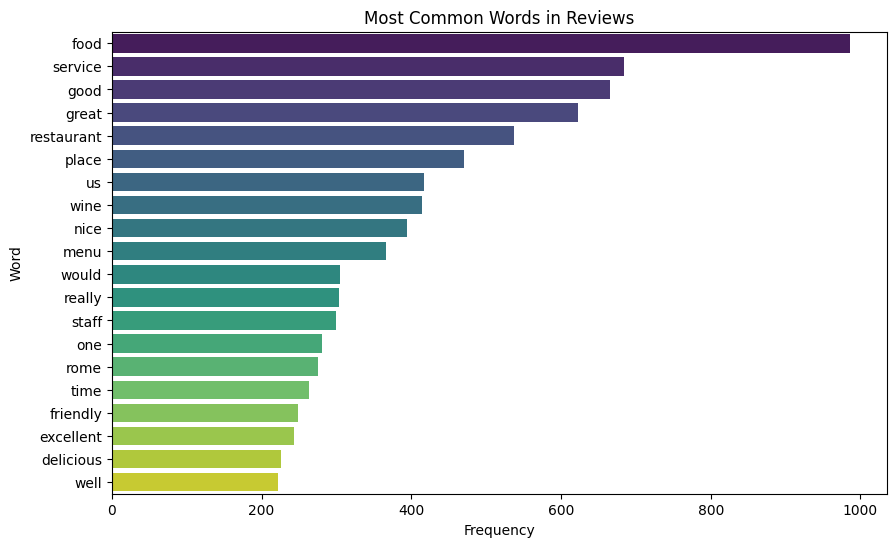

In [20]:
# Basic text analysis - top words in review titles and reviews
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Function to preprocess and tokenize text
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

# Tokenize review titles and reviews
review_titles_tokens = preprocess_text(" ".join(data['Review Title']))
reviews_tokens = preprocess_text(" ".join(data['Review']))

# Get the most common words in review titles and reviews
common_words_titles = Counter(review_titles_tokens).most_common(20)
common_words_reviews = Counter(reviews_tokens).most_common(20)

# Convert to DataFrame for plotting
df_common_words_titles = pd.DataFrame(common_words_titles, columns=['Word', 'Frequency'])
df_common_words_reviews = pd.DataFrame(common_words_reviews, columns=['Word', 'Frequency'])

# Plot the most common words in review titles
plt.figure(figsize=(10, 6))
sns.barplot(data=df_common_words_titles, x='Frequency', y='Word', palette='viridis')
plt.title('Most Common Words in Review Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Plot the most common words in reviews
plt.figure(figsize=(10, 6))
sns.barplot(data=df_common_words_reviews, x='Frequency', y='Word', palette='viridis')
plt.title('Most Common Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()
